In [33]:
import numba
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [34]:
def numpy_sum_squares(arr):
    return np.sum(arr ** 2)

In [35]:
@numba.jit(nopython = True)
def numba_sum_squares(arr):
    ans = 0.0
    for a in arr:
        ans += a ** 2
    return ans

In [36]:
array_len = []
numpy_times = []
numba_times = []

for i in range(9):
    size_arr = 10 ** i
    array_len.append(size_arr)
    arr = np.random.random(size_arr)
    
    numpy_time = timeit.timeit(lambda: numpy_sum_squares, number=10)
    numba_time = timeit.timeit(lambda: numba_sum_squares, number=10)

    numpy_times.append(numpy_time)
    numba_times.append(numba_time)

print(array_len)
print(numpy_times)
print(numba_times)

[1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]
[4.299989086575806e-06, 2.7000060072168708e-06, 4.199988325126469e-06, 3.5999983083456755e-06, 2.4999899324029684e-06, 2.4999899324029684e-06, 6.199989002197981e-06, 3.6999990697950125e-06, 9.2999980552122e-06]
[1.8999999156221747e-06, 1.500011421740055e-06, 1.8999999156221747e-06, 1.8999999156221747e-06, 2.6999914553016424e-06, 1.7999991541728377e-06, 2.3000029614195228e-06, 2.0000006770715117e-06, 3.3999967854470015e-06]


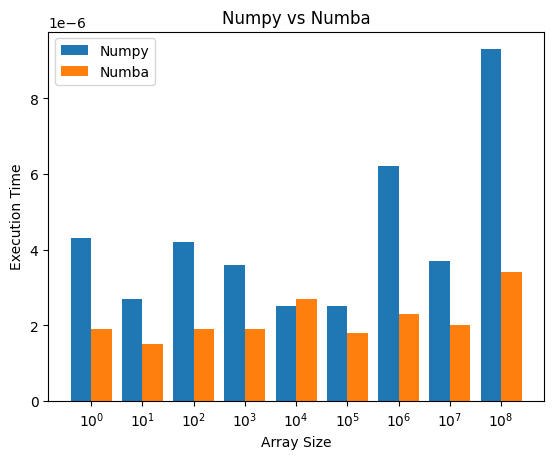

In [39]:
bar_width = 0.2
x = np.arange(len(array_len))

plt.figure()
plt.bar(x - 0.2, numpy_times, 0.4, label='Numpy')
plt.bar(x + 0.2, numba_times, 0.4, label='Numba')
plt.xlabel('Array Size')
plt.ylabel('Execution Time')
plt.title('Numpy vs Numba')
plt.xticks(x, [f'$10^{i}$' for i in range(len(array_len)) ])
plt.legend()
plt.show()